In [1]:
import scipy.stats

In [2]:
import numpy as np

## Time to Produce a Batch

-Blumenfeld (2009) teaches that 

### Estimate 1 month of production

- If the inter-departure time is gamma-distributed, how many occur in a month?

- Daily production time $t_{day} = 21 [\mathrm{hr}] $
- Production days per month $ n_{days} = 20.7 \left[\frac{\mathrm{days}}{\mathrm{month}} \right] $

In [3]:
dist = scipy.stats.gamma(0.5, 5)

In [4]:
dist.var()

0.5

In [5]:
dist.mean()

5.5

In [6]:
timeline = 100

In [7]:
iters = int(1e3)

In [8]:
counts =[]

In [9]:
for i in range(iters):
    j = 0
    cumsum = 0.0
    while cumsum < timeline:
        cumsum += dist.rvs()
        j += 1
    counts.append(j)    

In [10]:
np.mean(counts)

18.7

In [11]:
np.std(counts)

0.5865151319446072

In [12]:
np.min(counts)

17

#### Trying to cut down a larger array of samples

In [13]:
samp_max = int(1.5*np.max(counts))

In [14]:
iters = int(1e5)

In [15]:
counts = [len([
    j for j in np.cumsum(dist.rvs(samp_max)) if j < timeline
]) for i in range(iters)]

In [16]:
np.max(counts)

19

#### Using a fit of a gamma distribution

In [17]:
from small_scripts import match_gamma_cv2

In [18]:
timeline = 21.0*20.7

In [19]:
# idd_time = 1.0/0.84196   # count/hr
idd_time = timeline/336.0
idd_c2v = 0.25**2

In [20]:
dist = match_gamma_cv2(idd_time, idd_c2v)

In [21]:
ss_count = 1.0

In [22]:
iter1 = 20

In [23]:
counts = []
for i in range(iter1):
    j = 0
    cumsum = 0.0
    while cumsum < timeline:
        cumsum += dist.rvs()
        j += 1
    counts.append(j/ss_count)    

In [24]:
samp_max = int(1.5*np.max(counts))

iters = int(1e4)

In [25]:
counts = [len([
    j for j in np.cumsum(dist.rvs(samp_max)) if j < timeline
])/ss_count for i in range(iters)]

In [26]:
np.mean(counts)

335.4869

In [27]:
np.std(counts)

4.577491495349827

In [28]:
counts[1:10]

[337.0, 338.0, 333.0, 341.0, 338.0, 339.0, 337.0, 333.0, 332.0]

In [29]:
import matplotlib.pyplot as plt

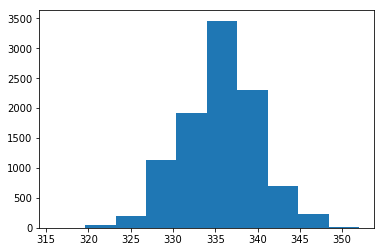

In [30]:
plt.axes()
plt.hist(counts)
plt.show()

#### create a function

In [31]:
from small_scripts import match_gamma_cv2

def prod_variation(cv):
    timeline = 21.0*20.7
    idd_time = timeline/336.0
    idd_c2v = cv**2
    dist = match_gamma_cv2(idd_time, idd_c2v)
    ss_count = 1.0
    iter1 = 20
    
    counts = []
    for i in range(iter1):
        j = 0
        cumsum = 0.0
        while cumsum < timeline:
            cumsum += dist.rvs()
            j += 1
        counts.append(j/ss_count)   
        
    samp_max = int(1.5*np.max(counts))

    iters = int(1e4)
    
    counts = [len([
        j for j in np.cumsum(dist.rvs(samp_max)) if j < timeline
    ])/ss_count for i in range(iters)]
    
    return counts    

## Go through results

In [32]:
from collections import OrderedDict as OD

In [35]:
import numpy as np

In [33]:
cvs = OD()
cvs['TS1_rev2'] = 0.25099800796
cvs['TS2_rev2'] = 0.24899799196
cvs['TS3_rev2'] = 0.25099800796
cvs['TP1_rev2'] = 0.24899799196
cvs['RI1'] = 0.25099800796

In [36]:
counts = OD()
for name,cv in cvs.items():
    print 'Calculating for: ' + name
    c = prod_variation(cv)
    counts[name] = c
    print np.std(c)

Calculating for: TS1_rev2
4.590577513777541
Calculating for: TS2_rev2
4.6052577767156535
Calculating for: TS3_rev2
4.663731371981024
Calculating for: TP1_rev2
4.523550153364059
Calculating for: RI1
4.5700309834835915


In [ ]:
plt.axes()
plt.boxplot(counts.values(), sym='', notch=False)
plt.xticks(np.arange(len(counts)+1), [''] + counts.keys())
plt.ylabel('Total Production Volume [spars per month]')
plt.title('Monthly Production Volume')
# plt.savefig('monthly-production-compare.png')
plt.show()